In [47]:
import numpy as np
import matplotlib.pyplot as plt

### Experiment 1: HP tuning 

EFG

In [48]:
# Prepare data
hidden_dim_range = [8, 16, 24, 32, 48, 64, 128, 256]
efg_bpi_mae_lr01 = np.random.normal(0.41, 0.01, len(hidden_dim_range))
efg_bpi_mae_lr001 = efg_bpi_mae_lr01 * np.random.uniform(0.99, 1.005, len(hidden_dim_range))
efg_cs_mae_lr01 = np.random.normal(0.55, 0.01, len(hidden_dim_range))
efg_cs_mae_lr001 = efg_cs_mae_lr01 * np.random.uniform(0.99, 1.005, len(hidden_dim_range))

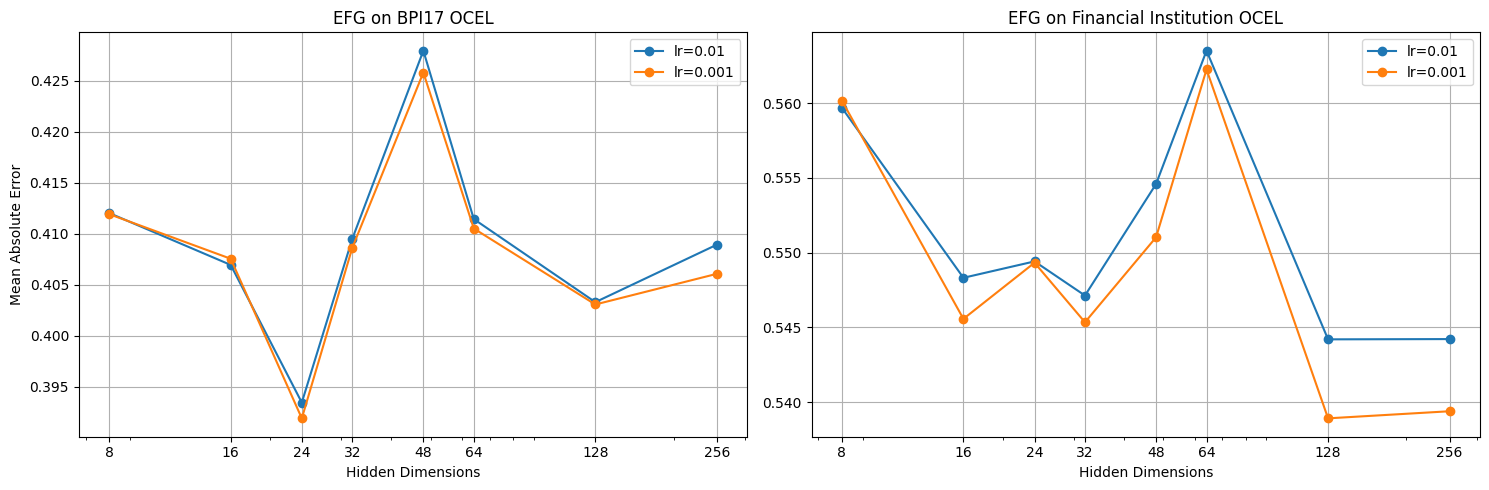

In [49]:
# CAPTION: test scores only
datasets = {
    "BPI17": {"lr=0.01": efg_bpi_mae_lr01, "lr=0.001": efg_bpi_mae_lr001},
    "Financial Institution": {"lr=0.01": efg_cs_mae_lr01, "lr=0.001": efg_cs_mae_lr001},
}

fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))  # 1 row and 2 columns of subplots
for axis,(dataset,lrs) in zip(axes,datasets.items()):
    if dataset=='BPI17':
        axis.set_ylabel("Mean Absolute Error")
    axis.semilogx(hidden_dim_range, lrs["lr=0.01"], marker="o", label="lr=0.01")
    axis.semilogx(hidden_dim_range, lrs["lr=0.001"], marker="o", label="lr=0.001")
    axis.set_title(f"EFG on {dataset} OCEL")
    axis.set_xlabel("Hidden Dimensions")
    axis.set_xticks(hidden_dim_range,hidden_dim_range)
    axis.legend()
    axis.grid(True)

plt.tight_layout()
plt.savefig('plots/exp1_hp_tuning/efg.pdf')

plt.show()

HOEG

In [50]:
# Prepare data
hidden_dim_range = [8, 16, 24, 32, 48, 64, 128, 256]
hoeg_bpi_mae_lr01 = np.random.uniform(0.18, 0.48, len(hidden_dim_range))
hoeg_bpi_mae_lr001 = hoeg_bpi_mae_lr01 * np.random.uniform(0.99, 1.005, len(hidden_dim_range))
hoeg_cs_mae_lr01 = np.random.normal(0.55, 0.005, len(hidden_dim_range))
hoeg_cs_mae_lr001 = hoeg_cs_mae_lr01 * np.random.uniform(0.99, 1.005, len(hidden_dim_range))

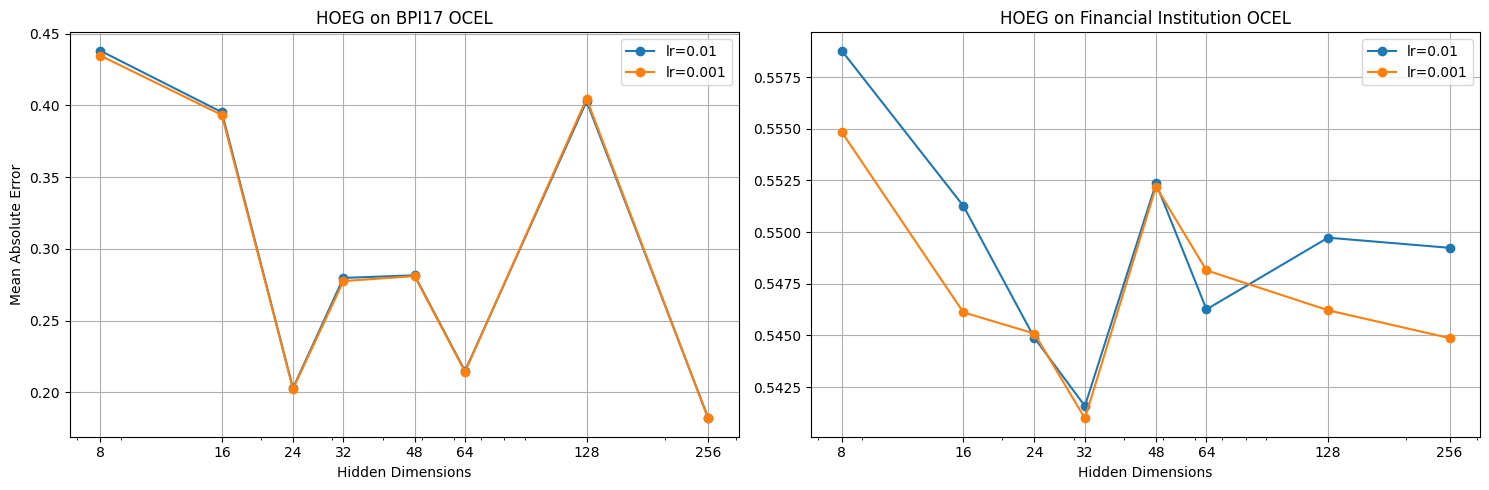

In [51]:
# CAPTION: test scores only
datasets = {
    "BPI17": {"lr=0.01": hoeg_bpi_mae_lr01, "lr=0.001": hoeg_bpi_mae_lr001},
    "Financial Institution": {"lr=0.01": hoeg_cs_mae_lr01, "lr=0.001": hoeg_cs_mae_lr001},
}

fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))  # 1 row and 2 columns of subplots
for axis,(dataset,lrs) in zip(axes,datasets.items()):
    if dataset=='BPI17':
        axis.set_ylabel("Mean Absolute Error")
    axis.semilogx(hidden_dim_range, lrs["lr=0.01"], marker="o", label="lr=0.01")
    axis.semilogx(hidden_dim_range, lrs["lr=0.001"], marker="o", label="lr=0.001")
    axis.set_title(f"HOEG on {dataset} OCEL")
    axis.set_xlabel("Hidden Dimensions")
    axis.set_xticks(hidden_dim_range,hidden_dim_range)
    axis.legend()
    axis.grid(True)

plt.tight_layout()
plt.savefig('plots/exp1_hp_tuning/hoeg.pdf')
plt.show()

### Experiment 2: Encoding Type

In [57]:
datasets = {
    "BPI17": {
        "train": {
            "mae_distribution": {
                "efg": efg_bpi_mae_lr01 + efg_bpi_mae_lr001,
                "hoeg": hoeg_bpi_mae_lr01 + hoeg_bpi_mae_lr001,
            }
        },
        "validation": {
            "mae_distribution": {
                "efg": efg_bpi_mae_lr01 + efg_bpi_mae_lr001,
                "hoeg": hoeg_bpi_mae_lr01 + hoeg_bpi_mae_lr001,
            }
        },
        "test": {
            "mae_distribution": {
                "efg": efg_bpi_mae_lr01 + efg_bpi_mae_lr001,
                "hoeg": hoeg_bpi_mae_lr01 + hoeg_bpi_mae_lr001,
            }
        },
    },
    "Financial Institution": {
        "train": {
            "mae_distribution": {
                "efg": efg_cs_mae_lr01 + efg_cs_mae_lr001,
                "hoeg": hoeg_cs_mae_lr01 + hoeg_cs_mae_lr001,
            }
        },
        "validation": {
            "mae_distribution": {
                "efg": efg_cs_mae_lr01 + efg_cs_mae_lr001,
                "hoeg": hoeg_cs_mae_lr01 + hoeg_cs_mae_lr001,
            }
        },
        "test": {
            "mae_distribution": {
                "efg": efg_cs_mae_lr01 + efg_cs_mae_lr001,
                "hoeg": hoeg_cs_mae_lr01 + hoeg_cs_mae_lr001,
            }
        },
    },
}

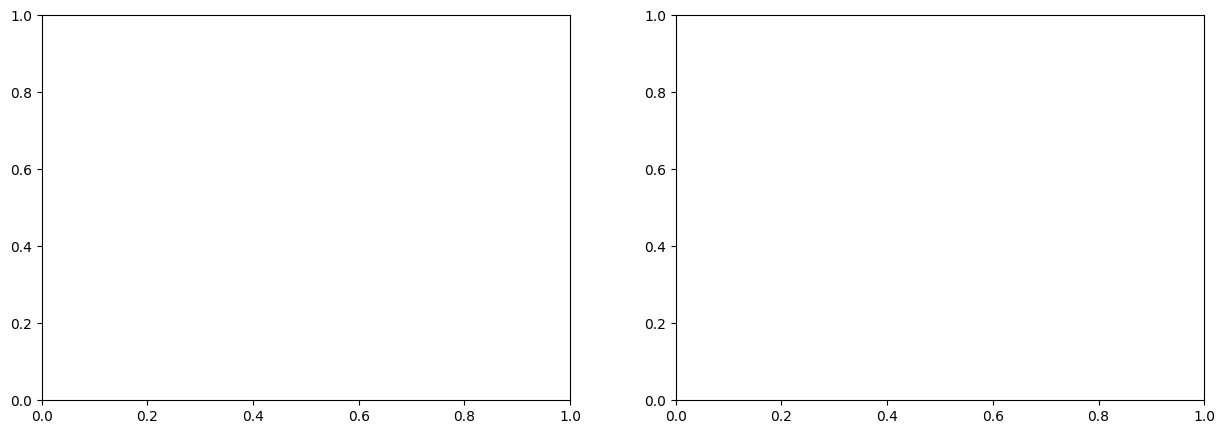

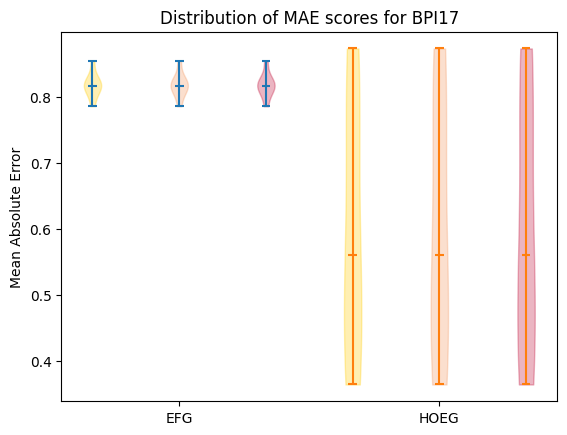

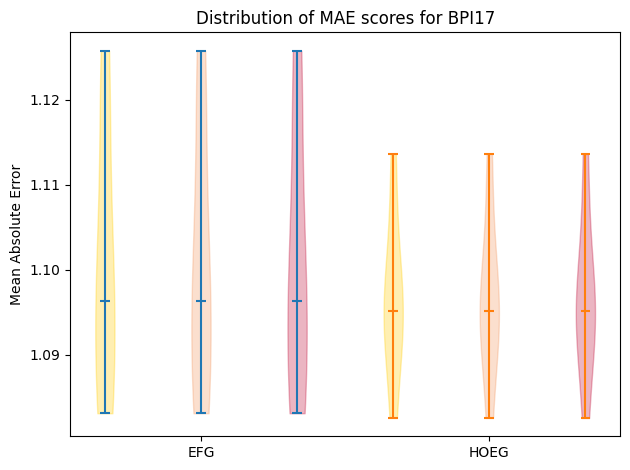

In [67]:
fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))  # 1 row and 2 columns of subplots
for axis,dataset in zip(axes,datasets.values()):
    # Combine the data for each encoding
    efg = [
        dataset["train"]["mae_distribution"]["efg"],
        dataset["validation"]["mae_distribution"]["efg"],
        dataset["test"]["mae_distribution"]["efg"],
    ]
    hoeg = [
        dataset["train"]["mae_distribution"]["hoeg"],
        dataset["validation"]["mae_distribution"]["hoeg"],
        dataset["test"]["mae_distribution"]["hoeg"],
    ]
    # Create a figure and axes
    fig, ax = plt.subplots()
    # Plot the violin plots
    violin_parts1 = ax.violinplot(efg, showmedians=True, positions=[1, 2, 3], widths=0.2)
    violin_parts2 = ax.violinplot(hoeg, showmedians=True, positions=[4, 5, 6], widths=0.2)
    # Set labels for x-axis
    ax.set_xticks([2, 5])
    ax.set_xticklabels(['EFG', 'HOEG'])
    # Set y-axis label
    ax.set_ylabel('Mean Absolute Error')
    # Set plot title
    ax.set_title('Distribution of MAE scores for BPI17')
    # Customize colors for each dataset
    colors = ['#FFCD00', '#F3965E', '#C00A35']
    for i, violin1 in enumerate(violin_parts1['bodies']):
        violin1.set_color(colors[i])
        violin1.set_facecolor(colors[i])
    for i, violin2 in enumerate(violin_parts2['bodies']):
        violin2.set_color(colors[i])
        violin2.set_facecolor(colors[i])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
for x in zip(violin_parts1['bodies'],violin_parts2['bodies']):
    print(x)

(<matplotlib.collections.PolyCollection object at 0x7f8579039100>, <matplotlib.collections.PolyCollection object at 0x7f8579041a00>)
(<matplotlib.collections.PolyCollection object at 0x7f857dd08e80>, <matplotlib.collections.PolyCollection object at 0x7f85790415b0>)
(<matplotlib.collections.PolyCollection object at 0x7f8579047970>, <matplotlib.collections.PolyCollection object at 0x7f8579041b80>)
